In [33]:
#importing different libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [34]:
#display the video in notebook
ipd.Video('video.mp4', width=700)

In [35]:
#open the video and read metadata
cap = cv2.VideoCapture('video.mp4')

In [36]:
#total number of frames in the video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

788.0

In [37]:
#video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 1080.0, Width 1920.0


In [38]:
#get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 30.00


In [39]:
#release the video
cap.release()

In [40]:
#extract images from video by reading the frames of the video
cap = cv2.VideoCapture('video.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (1080, 1920, 3)


In [41]:
#plotting the image of the video using this function
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

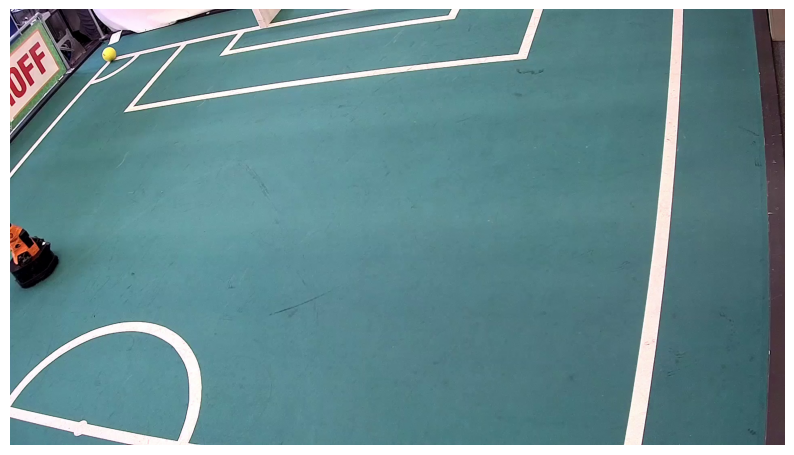

In [42]:
#plotting
display_cv2_img(img)

In [43]:
cap.release()

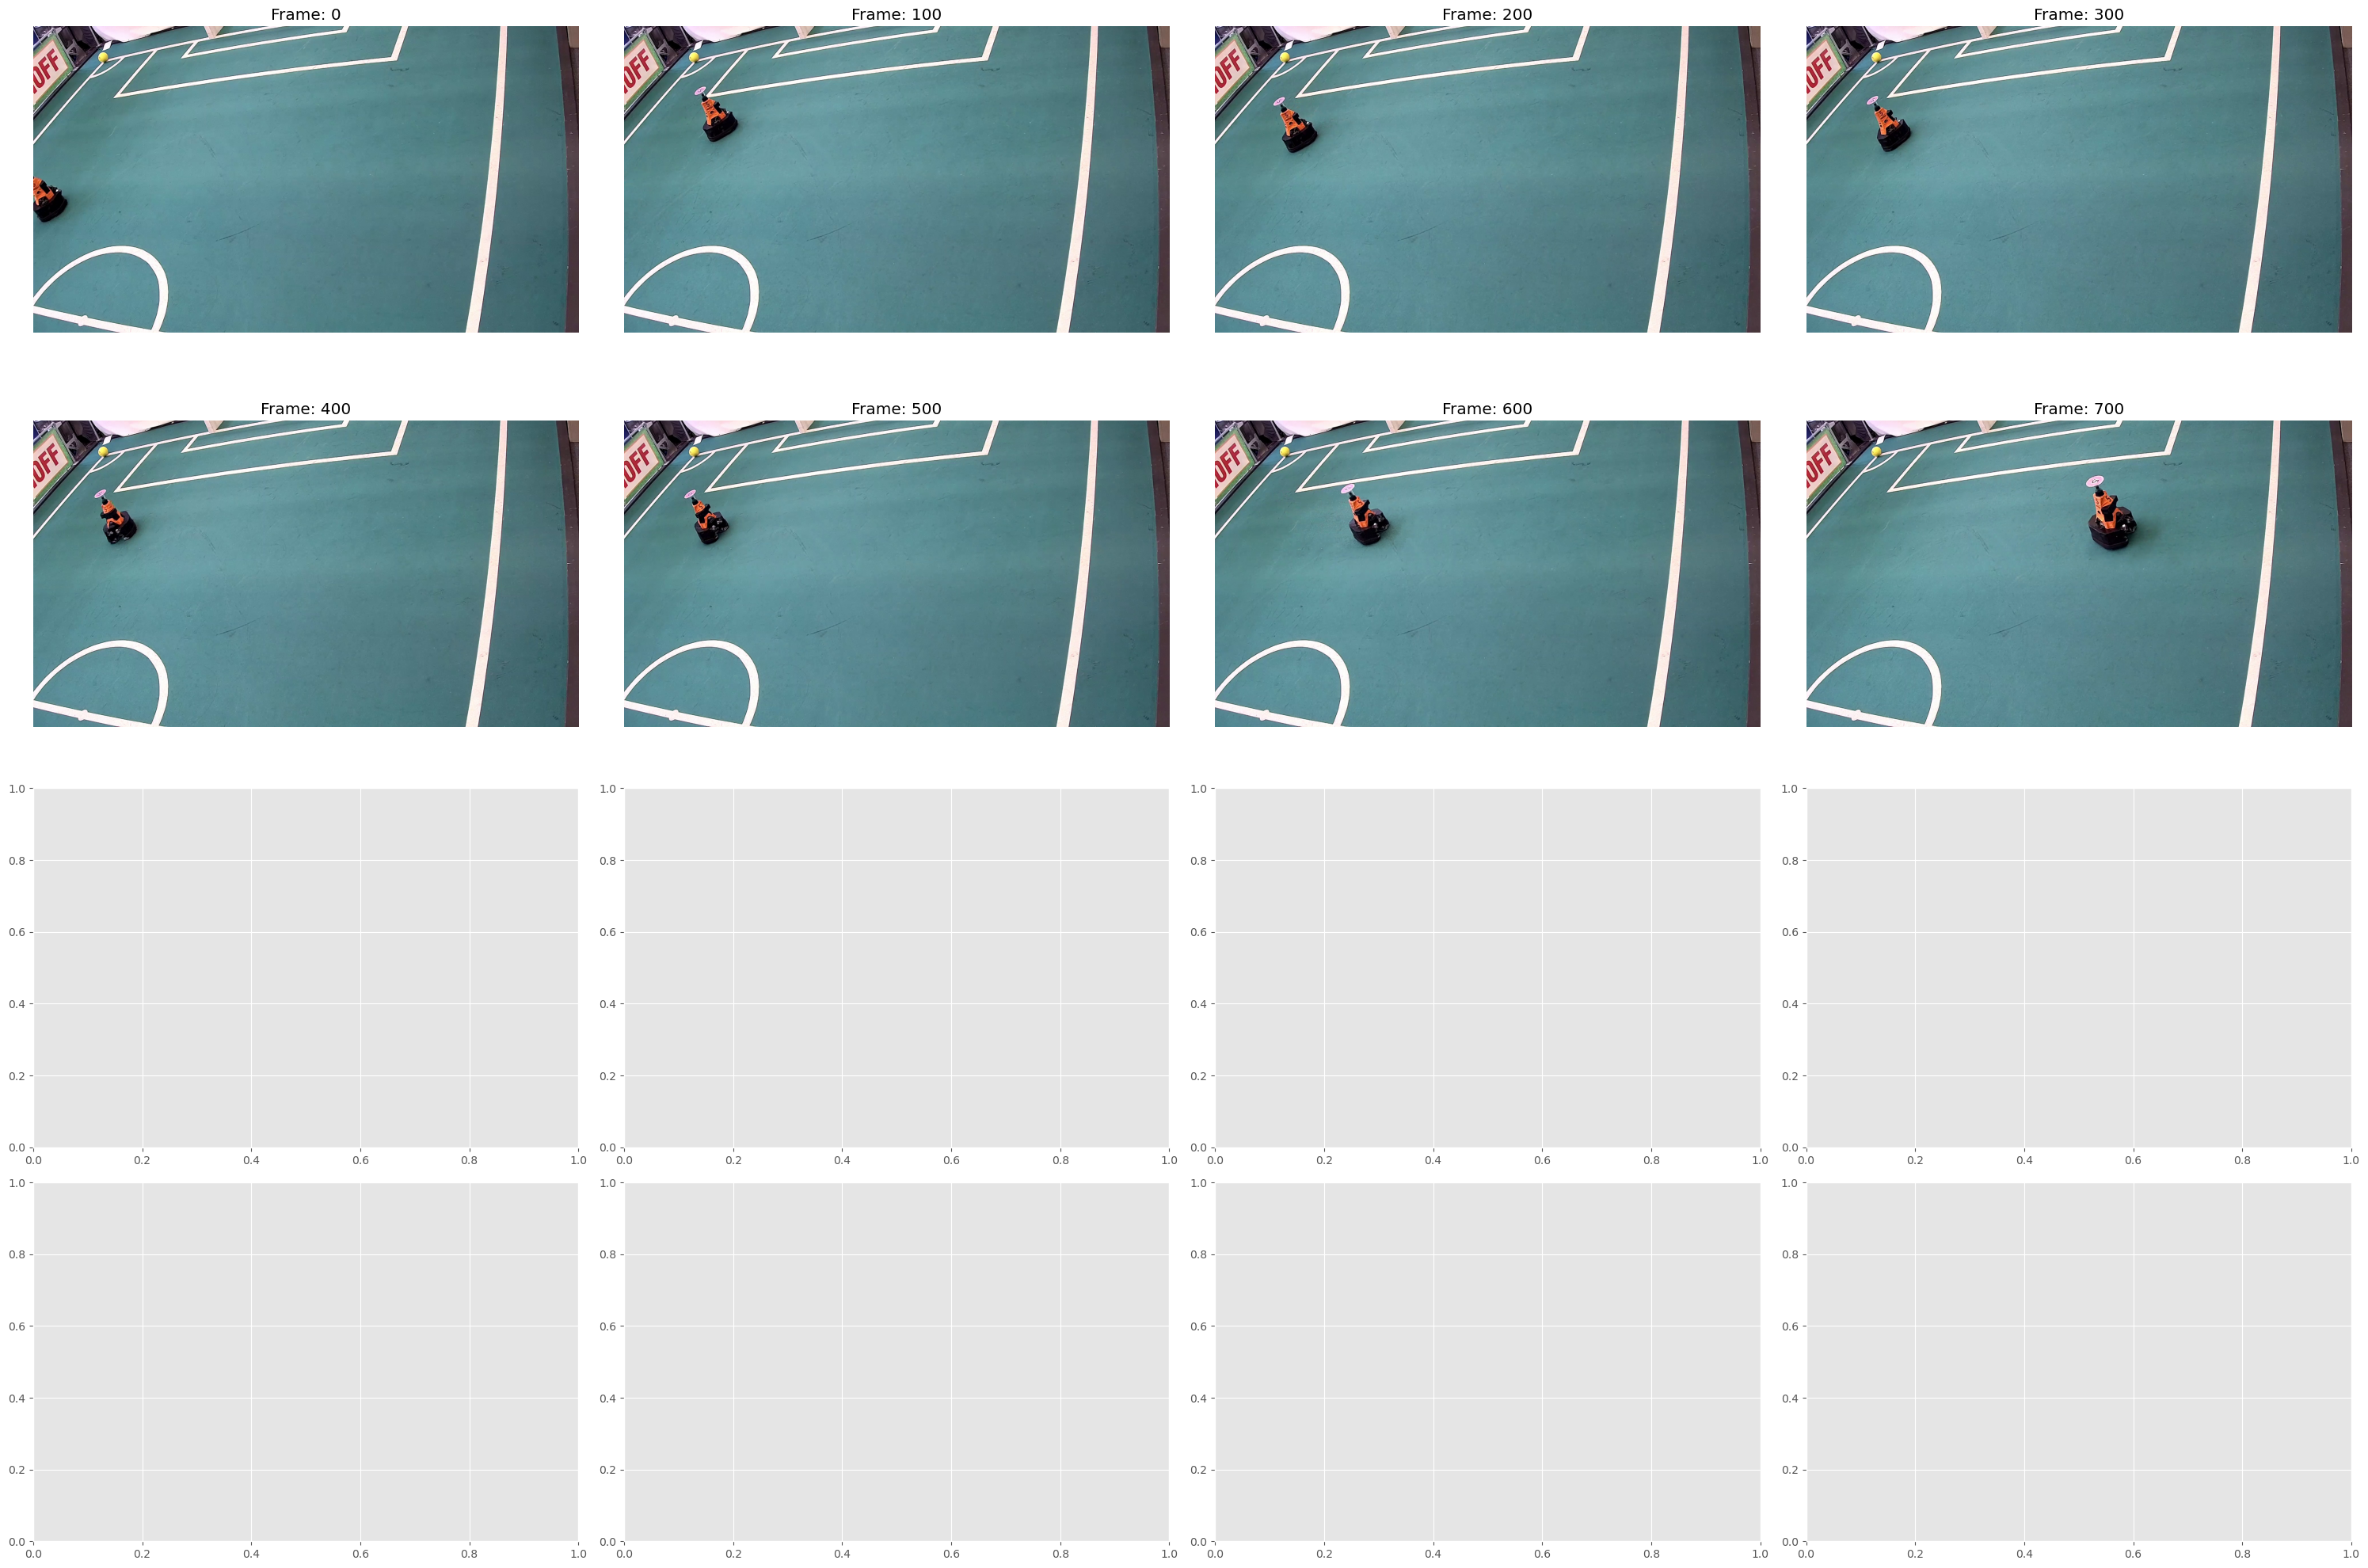

In [44]:
#display multiple frames from the video
fig, axs = plt.subplots(4, 4, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("video.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [ ]:
cap = cv2.VideoCapture("video.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    B = img[:,:,2]
    Y = 255-B

    thresh = cv2.adaptiveThreshold(Y,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,15,5)

    contours, hierarchy = cv2.findContours(thresh,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

    x=[]
    for i in range(0, len(contours)):
        if cv2.contourArea(contours[i]) > 100:
            x.append(contours[i])
    cv2.drawContours(img, x, -1, (255,0,0), 2) 
    cv2.imshow("img", img)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

plt.tight_layout()
plt.show()
cap.release()

In [ ]:

im = cv2.imread("img")
B = img[:,:,2]
Y = 255-B

thresh = cv2.adaptiveThreshold(Y,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,15,5)

contours, hierarchy = cv2.findContours(thresh,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

x=[]
for i in range(0, len(contours)):
    if cv2.contourArea(contours[i]) > 100:
        x.append(contours[i])
cv2.drawContours(img, x, -1, (255,0,0), 2) 

display_cv2_img(img)